### Assignment 2, Question 1
#### Devon Richtsmeier

### 1. Choose a logistic regression for a multiclass classification using MNIST data.

In [25]:
# Load the appropriate packages

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')

print('Packages loaded.')

Packages loaded.


### a. Do not use PCA. To make images noisy, use different c_noise. Choose a set n_noise = [0, 0.25, 0.5, 1, 1.5, 2, 3, 4.5, 10, 20, 30, 40, 50]. Train the model for each n_noise. Find corresponding accuracy (use, for example, metrics.accuracy_score(pred_va, tar_va)). Plot:  accouracy  vs. n_noise.

### Load the MNIST data from tensorflow and define the input and target sets for training and validation.

In [26]:
# Get the MNIST data 
from tensorflow.keras.datasets import mnist

# Define the input and target sets for both and normalizing the input
(input_tr, target_tr), (input_va, target_va) = mnist.load_data()

# Reshape the data from images into vectors
input_tr = np.reshape(input_tr, (-1,784)) 
input_va = np.reshape(input_va, (-1,784))

print('The shape of the input training set is: ', np.shape(input_tr))
print('The shape of the input validation set is: ', np.shape(input_va))

# Combine the target training and validation sets
tarT = np.concatenate((target_tr, target_va))

The shape of the input training set is:  (60000, 784)
The shape of the input validation set is:  (10000, 784)


In [ ]:
# The various noise levels to add to the MNIST data
n_noise = np.array([0, 0.25, 0.5, 1, 1.5, 2, 3, 4.5, 10, 20, 30, 40, 50])

# Set the baseline noise arrays (not scaled by the n_noise values)
noise_train = np.random.rand(60000, 784)
noise_valid = np.random.rand(10000, 784)

# Initialize an array to hold the accuracy score for each level of n_noise
acc_no_pca = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with Logistic Regessor
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale
    inp_tr = input_tr/255
    inp_va = input_va/255
    
    # Add the noise to the MNIST data and normalize
    inp_tr = (inp_tr + noise_tr)/(1 + c_noise)
    inp_va = (inp_va + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets
    inpT = np.concatenate((inp_tr, inp_va))
    
    # Split the data into training and test
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Set up the logistic regressor
    log_reg = LogisticRegression(penalty='l2', verbose=1)
    
    # Fit the data
    log_reg.fit(inp_tr, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = log_reg.predict(inp_tr)
    pred_va = log_reg.predict(inp_va)
    
    # Find the accuracy score of the metric
    acc_no_pca[c_idx] = metrics.accuracy_score(pred_va, tar_va)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

### Plot the accuracy score vs. level of noise

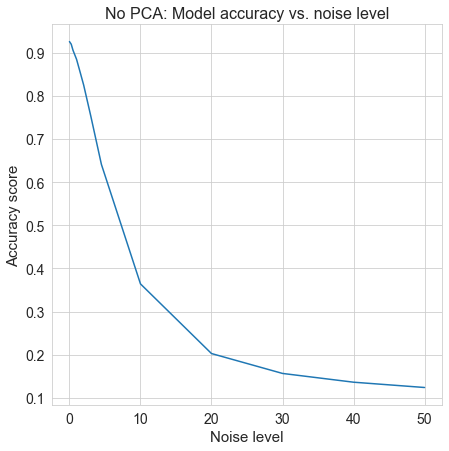

In [11]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_no_pca = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_no_pca)
plt.title('No PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

### b. Do the same step above; however, use a fixed PCA (n_component=100) this time. Plot accuracy vs. n_noise on the same plot.

In [13]:
# Initialize an array to hold the accuracy score for each level of n_noise, this time with PCA with 100 components
acc_with_pca100 = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with Logistic Regessor
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale
    inp_tr = input_tr/255
    inp_va = input_va/255
    
    # Add the noise to the MNIST data and normalize
    inp_tr = (inp_tr + noise_tr)/(1 + c_noise)
    inp_va = (inp_va + noise_va)/(1 + c_noise)
    
    # Print the shape of the training and validation sets
    print('Noise level:', c_noise)
    print('Data shape: ', np.shape(inp_tr), np.shape(inp_va))
    print()
    
    # Initialize the PCA transformer with n_components = 100
    pca = PCA(n_components=100)

    # Fit the 
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    # Set up the logistic regressor
    log_reg = LogisticRegression(penalty='l2', verbose=1)
    
    # Fit the data
    log_reg.fit(inp_tr_pca, target_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = log_reg.predict(inp_tr_pca)
    pred_va = log_reg.predict(inp_va_pca)
    
    # Find the accuracy score of the metric
    acc_with_pca100[c_idx] = metrics.accuracy_score(pred_va, target_va)

Noise level: 0.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished


Noise level: 0.25
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s finished


Noise level: 0.5
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished


Noise level: 1.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


Noise level: 1.5
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Noise level: 2.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Noise level: 3.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Noise level: 4.5
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


Noise level: 10.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


Noise level: 20.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Noise level: 30.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Noise level: 40.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Noise level: 50.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


### Plot the accuracy score vs. level of noise

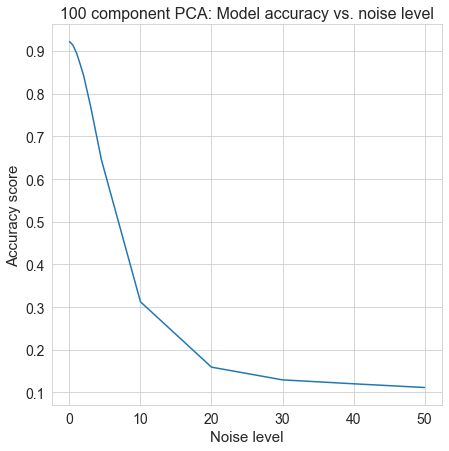

In [15]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_with_pca100 = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_with_pca100)
plt.title('100 component PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

### c. Do the same above with PCA (n_components=20).

In [16]:
# Initialize an array to hold the accuracy score for each level of n_noise, this time with PCA with 20 components
acc_with_pca20 = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with Logistic Regessor
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale
    inp_tr = input_tr/255
    inp_va = input_va/255
    
    # Add the noise to the MNIST data and normalize
    inp_tr = (inp_tr + noise_tr)/(1 + c_noise)
    inp_va = (inp_va + noise_va)/(1 + c_noise)
    
    # Print the shape of the training and validation sets
    print('Noise level:', c_noise)
    print('Data shape: ', np.shape(inp_tr), np.shape(inp_va))
    print()
    
    # Initialize the PCA transformer with n_components = 20
    pca = PCA(n_components=20)

    # Fit the 
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    # Set up the logistic regressor
    log_reg = LogisticRegression(penalty='l2', verbose=1)
    
    # Fit the data
    log_reg.fit(inp_tr_pca, target_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = log_reg.predict(inp_tr_pca)
    pred_va = log_reg.predict(inp_va_pca)
    
    # Find the accuracy score of the metric
    acc_with_pca20[c_idx] = metrics.accuracy_score(pred_va, target_va)

Noise level: 0.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


Noise level: 0.25
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Noise level: 0.5
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Noise level: 1.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


Noise level: 1.5
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


Noise level: 2.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


Noise level: 3.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


Noise level: 4.5
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


Noise level: 10.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Noise level: 20.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Noise level: 30.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Noise level: 40.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Noise level: 50.0
Data shape:  (60000, 784) (10000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


### Plot the accuracy score vs. level of noise

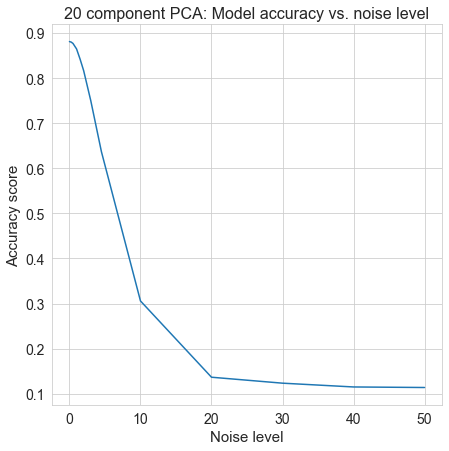

In [17]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_with_pca20 = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_with_pca20)
plt.title('20 component PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

### d. Compare three curves and discuss/explain what you see in the plot. 

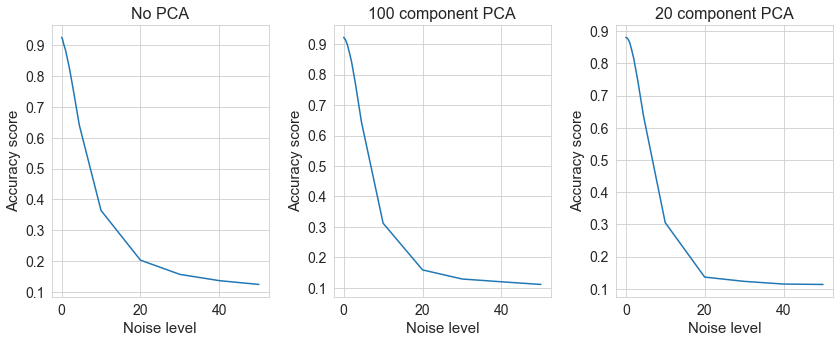

In [22]:
# Set up the figure with all 3 plots
fig_all, ax = plt.subplots(1, 3, figsize=(14, 5))

# No PCA
ax[0].plot(n_noise, acc_no_pca)
ax[0].set_title('No PCA', fontsize=16)
ax[0].set_xlabel('Noise level', fontsize=15)
ax[0].set_ylabel('Accuracy score', fontsize=15)
ax[0].tick_params(labelsize=14)

# Components = 100
ax[1].plot(n_noise, acc_with_pca100)
ax[1].set_title('100 component PCA', fontsize=16)
ax[1].set_xlabel('Noise level', fontsize=15)
ax[1].set_ylabel('Accuracy score', fontsize=15)
ax[1].tick_params(labelsize=14)

# Components = 20
ax[2].plot(n_noise, acc_with_pca20)
ax[2].set_title('20 component PCA', fontsize=16)
ax[2].set_xlabel('Noise level', fontsize=15)
ax[2].set_ylabel('Accuracy score', fontsize=15)
ax[2].tick_params(labelsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()